# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [61]:

print(df.head(50))


          x1        x2  y
0   0.107143  0.603070  1
1   0.093318  0.649854  1
2   0.097926  0.705409  1
3   0.155530  0.784357  1
4   0.210829  0.866228  1
5   0.328341  0.929094  1
6   0.429724  0.934942  1
7   0.620968  0.934942  1
8   0.756912  0.910088  1
9   0.819124  0.879386  1
10  0.809908  0.836988  1
11  0.750000  0.819444  1
12  0.773041  0.854532  1
13  0.770737  0.889620  1
14  0.766129  0.899854  1
15  0.779954  0.835526  1
16  0.750000  0.791667  1
17  0.761521  0.765351  1
18  0.814516  0.832602  1
19  0.814516  0.885234  1
20  0.563364  0.921784  1
21  0.494240  0.899854  1
22  0.480415  0.863304  1
23  0.448157  0.819444  1
24  0.425115  0.857456  1
25  0.450461  0.899854  1
26  0.510369  0.937865  1
27  0.498848  0.945175  1
28  0.351382  0.934942  1
29  0.273041  0.901316  1
30  0.233871  0.861842  1
31  0.215438  0.858918  1
32  0.134793  0.861842  1
33  0.074885  0.872076  1
34  0.058756  0.872076  1
35  0.100230  0.838450  1
36  0.120968  0.831140  1
37  0.132488

In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 20.4 KB
None


In [59]:
print(data.keys())
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Clases en y:", np.unique(y))


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X shape: (863, 2)
y shape: (863,)
Clases en y: [0 1]


In [63]:
from scipy.io import loadmat

data = loadmat("ejer_1_data1.mat")
data         


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [64]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [65]:
data['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [ ]:
import pandas as pd

df = pd.DataFrame(X, columns=["x1", "x2"])

df["y"] = y

print(df.head())


         x1        x2  y
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1


In [67]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 20.4 KB


In [68]:
# describe del df
df.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


In [69]:
# value counts de las clases normalizado
# value counts de las clases normalizado
print(df["y"].value_counts(normalize=True))


y
1    0.556199
0    0.443801
Name: proportion, dtype: float64


#### 4. Plot a scatterplot with the data

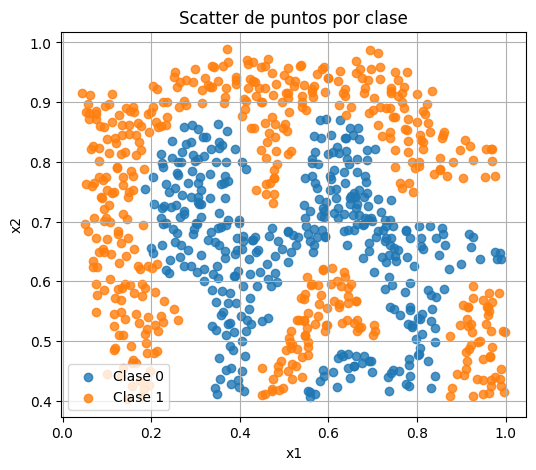

In [70]:
import matplotlib.pyplot as plt

# Asumo que df tiene columnas: "x1", "x2" y "y"

plt.figure(figsize=(6, 5))

for clase in sorted(df["y"].unique()):
    subset = df[df["y"] == clase]
    plt.scatter(
        subset["x1"],
        subset["x2"],
        label=f"Clase {clase}",
        alpha=0.8
    )

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter de puntos por clase")
plt.legend(loc="lower left")  # leyenda abajo a la izquierda
plt.grid(True)

plt.show()


Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [71]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(
    C=1,
    loss="hinge",
    max_iter=10000,
    random_state=42
)


#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [72]:


lin_svc.fit(X, y)


score = lin_svc.score(X, y)

print(f"Score: {score:.4f}")



Score: 0.5539


It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [73]:
# equivalente a lo anterior pero subiendo el hiperparámetro C

from sklearn.svm import LinearSVC

Cs = [1]

for C in Cs:
    lin_svc = LinearSVC(
        C=C,
        loss="hinge",
        max_iter=10000,
        random_state=42
    )
    lin_svc.fit(X, y)
    score = lin_svc.score(X, y)
    print(f"C={C:<5} score = {score:.4f}")


C=1     score = 0.5539


This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [74]:
# valores de la función de decisión para cada punto de X
decision_values = lin_svc.decision_function(X)

print(decision_values[:50])   
print("Shape:", decision_values.shape)


[0.30397428 0.47915284 0.66494664 0.87500091 1.09752339 1.18905135
 1.1019437  0.89976817 0.67075433 0.4996166  0.36384888 0.36696998
 0.46303445 0.58589263 0.62588725 0.39049745 0.27163894 0.16914253
 0.34392467 0.52455841 0.91550639 0.91331747 0.80249261 0.68606637
 0.84088315 0.95959888 1.0267208  1.06398836 1.18476374 1.15217784
 1.0581115  1.06756292 1.16285281 1.2613086  1.27835953 1.11910977
 1.07209837 0.99970864 0.85936432 0.79598844 0.73290287 0.6351327
 0.49664156 0.45075356 0.41563033 0.25837827 0.16523272 0.20337543
 0.40047632 0.44704909]
Shape: (863,)


In [75]:
# w · x + b
w = lin_svc.coef_[0]       # vector de pesos (w1, w2)
b = lin_svc.intercept_[0]  # término independiente

print("w:", w)
print("b:", b)

# la función de decisión f(x1, x2) = w1*x1 + w2*x2 + b


w: [-1.05716014  3.43201354]
b: -1.6525028163261999


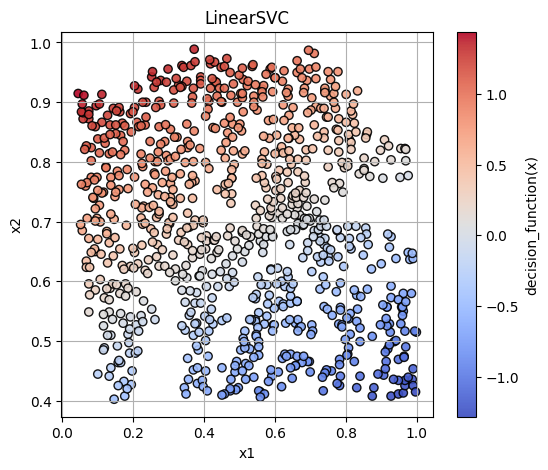

In [76]:


# usa un scatter para pintar los puntos, usa en el parámetro c del scatterplot la función de decisión
# el color puede ser "coolwarm"

decision_values = lin_svc.decision_function(X)

plt.figure(figsize=(6, 5))

scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=decision_values,     
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("LinearSVC")

cbar = plt.colorbar(scatter)
cbar.set_label("decision_function(x)")

plt.grid(True)
plt.show()


#### 9. Do the same with the second model

In [ ]:
import pandas as pd




In [54]:
from scipy.io import loadmat

data = loadmat("ejer_1_data2.mat")

# Leer el txt usando ; como separador
df = pd.read_csv("ejer_2_data2.mat", sep=";")

# Guardarlo como CSV estándar (separado por comas)
df.to_csv("fichero.csv", index=False)



FileNotFoundError: [Errno 2] No such file or directory: 'ejer_2_data2.mat'

In [47]:
print("X2 shape:", X2.shape)
print("y2 shape:", y2.shape)
print("Clases en y2:", np.unique(y2))

NameError: name 'X2' is not defined

In [36]:
df2 = pd.DataFrame(X2, columns=["x1", "x2"])
df2["y"] = y2

print(df2.head())
df2.info()

NameError: name 'X2' is not defined

X2 shape: (863, 2)
y2 shape: (863,)
Clases en y2: [0 1]
         x1        x2  y
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


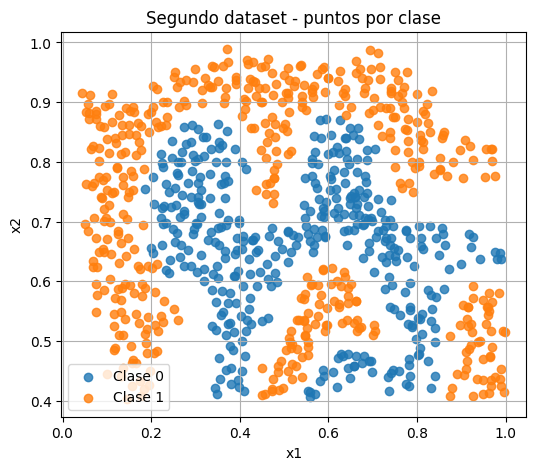

Score primer modelo (C=1): 0.5539
C=1     -> score = 0.5539
C=10    -> score = 0.5724
C=100   -> score = 0.5724
C=1000  -> score = 0.5875


c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C=10000 -> score = 0.4438

Mejor C encontrado: 1000 con score=0.5875


c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


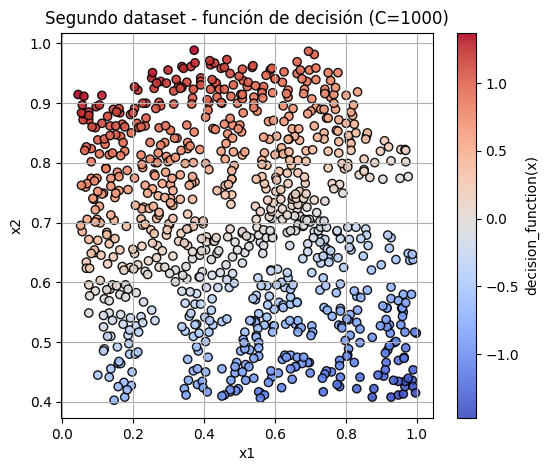

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import LinearSVC

# ============================
# 1. Cargar datos del segundo ejercicio
# ============================
data2 = loadmat("ejer_1_data2.mat")

X2 = data2["X"]
y2 = data2["y"].ravel()   # vector 1D

print("X2 shape:", X2.shape)
print("y2 shape:", y2.shape)
print("Clases en y2:", np.unique(y2))

# ============================
# 2. DataFrame con features y target
# ============================
df2 = pd.DataFrame(X2, columns=["x1", "x2"])
df2["y"] = y2

print(df2.head())
df2.info()

# ============================
# 3. Scatter coloreado por clase
# ============================


# ============================
# 4. Primer modelo: LinearSVC con C=1
# ============================


# ============================
# 5. Segundo modelo: aumentar C hasta ajustar mejor
# ============================
Cs = [1, 10, 100, 1000, 10000]
best_C = None
best_score = -np.inf

for C in Cs:
    model = LinearSVC(
        C=C,
        loss="hinge",
        max_iter=10000,
        random_state=42
    )
    model.fit(X2, y2)
    s = model.score(X2, y2)
    print(f"C={C:<5} -> score = {s:.4f}")
    if s > best_score:
        best_score = s
        best_C = C
        best_model_2 = model  # guardamos el mejor

print(f"\nMejor C encontrado: {best_C} con score={best_score:.4f}")

# Este será tu “segundo modelo” para el dataset 2
lin_svc_2_b = best_model_2

# ============================
# 6. Función de decisión y scatter coloreado (segundo modelo)
# ============================
decision_values_2 = lin_svc_2_b.decision_function(X2)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X2[:, 0],
    X2[:, 1],
    c=decision_values_2,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"Segundo dataset - función de decisión (C={best_C})")

cbar = plt.colorbar(scatter)
cbar.set_label("decision_function(x)")

plt.grid(True)
plt.show()


In [88]:
# equivalente pero con el segundo modelo
print(df2.head(50))

          x1        x2  y
0   0.107143  0.603070  1
1   0.093318  0.649854  1
2   0.097926  0.705409  1
3   0.155530  0.784357  1
4   0.210829  0.866228  1
5   0.328341  0.929094  1
6   0.429724  0.934942  1
7   0.620968  0.934942  1
8   0.756912  0.910088  1
9   0.819124  0.879386  1
10  0.809908  0.836988  1
11  0.750000  0.819444  1
12  0.773041  0.854532  1
13  0.770737  0.889620  1
14  0.766129  0.899854  1
15  0.779954  0.835526  1
16  0.750000  0.791667  1
17  0.761521  0.765351  1
18  0.814516  0.832602  1
19  0.814516  0.885234  1
20  0.563364  0.921784  1
21  0.494240  0.899854  1
22  0.480415  0.863304  1
23  0.448157  0.819444  1
24  0.425115  0.857456  1
25  0.450461  0.899854  1
26  0.510369  0.937865  1
27  0.498848  0.945175  1
28  0.351382  0.934942  1
29  0.273041  0.901316  1
30  0.233871  0.861842  1
31  0.215438  0.858918  1
32  0.134793  0.861842  1
33  0.074885  0.872076  1
34  0.058756  0.872076  1
35  0.100230  0.838450  1
36  0.120968  0.831140  1
37  0.132488

In [89]:
# equivalente con el segundo modelo
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


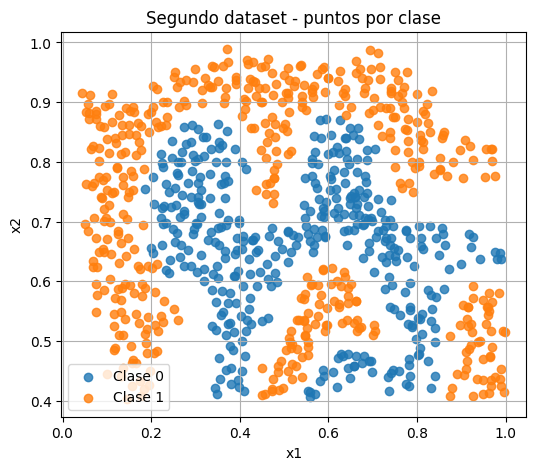

In [90]:
# equivalente con el segundo modelo
plt.figure(figsize=(6, 5))
for clase in sorted(df2["y"].unique()):
    subset = df2[df2["y"] == clase]
    plt.scatter(
        subset["x1"],
        subset["x2"],
        label=f"Clase {clase}",
        alpha=0.8
    )

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Segundo dataset - puntos por clase")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [91]:
lin_svc_2_a = LinearSVC(
    C=1,
    loss="hinge",
    max_iter=10000,
    random_state=42
)

lin_svc_2_a.fit(X2, y2)
score_a = lin_svc_2_a.score(X2, y2)
print(f"Score primer modelo (C=1): {score_a:.4f}")

Score primer modelo (C=1): 0.5539


y = ax1 + bx2 + c

0 = ax1 + bx2 + c

x2 = -ax1/b - c/b

In [ ]:
from sklearn.svm import LinearSVC

lin_svc_2_a = LinearSVC(
    C=1,
    loss="hinge",
    max_iter=10000,
    random_state=42
)

lin_svc_2_a.fit(X2, y2)
score_a = lin_svc_2_a.score(X2, y2)
print(f"Score primer modelo (C=1): {score_a:.4f}")


print("\nCoeficientes (coef_):")
print(lin_svc_2_a.coef_)

print("\nIntercepto (intercept_):")
print(lin_svc_2_a.intercept_)


w = lin_svc_2_a.coef_[0]       # [w1, w2]
b = lin_svc_2_a.intercept_[0]  # escalar

print(f"\nw1 = {w[0]:.4f}, w2 = {w[1]:.4f}")
print(f"b  = {b:.4f}")


Score primer modelo (C=1): 0.5539

Coeficientes (coef_):
[[-1.05716014  3.43201354]]

Intercepto (intercept_):
[-1.65250282]

w1 = -1.0572, w2 = 3.4320
b  = -1.6525


In [95]:
# usando tu modelo lin_svc_2_a ya entrenado
a = lin_svc_2_a.coef_[0][0]   # w1
b = lin_svc_2_a.coef_[0][1]   # w2
c = lin_svc_2_a.intercept_[0] # b

print(a, b, c)


-1.0571601381967413 3.4320135375855694 -1.6525028163261999


In [96]:
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

model = lin_svc_2_a   


decision_vals = model.decision_function(X2)

a = model.coef_[0][0]
b = model.coef_[0][1]
c = model.intercept_[0]


x1_min, x1_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
x1_line = np.linspace(x1_min, x1_max, 200)


x2_line = -(a * x1_line + c) / b

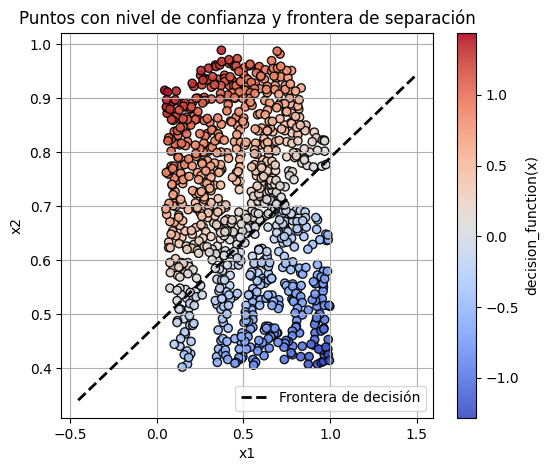

In [ ]:



plt.figure(figsize=(6, 5))

sc = plt.scatter(
    X2[:, 0],
    X2[:, 1],
    c=decision_vals,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.9
)

plt.plot(x1_line, x2_line, "k--", linewidth=2, label="Frontera de decisión")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Puntos con nivel de confianza y frontera de separación")

cbar = plt.colorbar(sc)
cbar.set_label("decision_function(x)")

plt.legend(loc="best")
plt.grid(True)
plt.show()


Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [ ]:
from scipy.io import loadmat

data2 = loadmat("ejer_1_data2.mat")  


print(data2.keys())



X2 = data2["X"]          
y2 = data2["y"].ravel()  


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [5]:

print("X2 shape:", X2.shape)
print("y2 shape:", y2.shape)
print("Clases en y2:", np.unique(y2))



X2 shape: (863, 2)
y2 shape: (863,)
Clases en y2: [0 1]


In [ ]:
print(data2.keys())   

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


#### 2. Create a DataFrame with the features and target

In [3]:
# crea el df
# muestra su head
df2 = pd.DataFrame(X2, columns=["x1", "x2"])
df2["y"] = y2

display(df2.head())

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [9]:
# la info del df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [10]:
# describe del df
df2.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

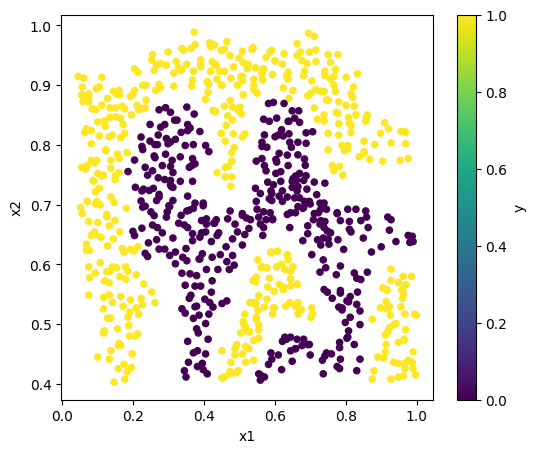

In [11]:
# scatterplot y en hue la y
df2.plot.scatter(x="x1", y="x2", c="y", colormap="viridis", figsize=(6,5))

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

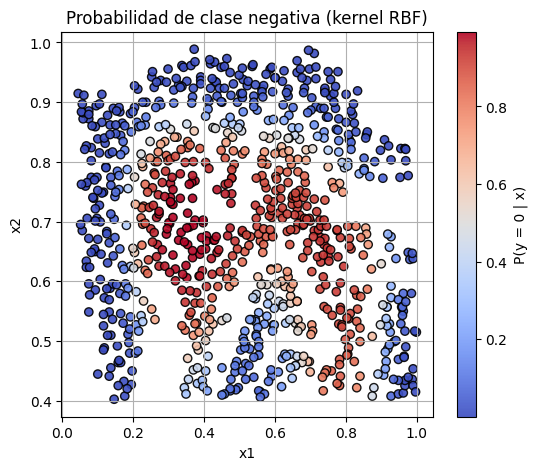

In [ ]:
# Probabilidad de clase negativa (asumo clases [0, 1])
probs_neg = svc_3.predict_proba(X2)[:, 0]  # P(y=0 | x)

plt.figure(figsize=(6, 5))

sc = plt.scatter(
    X2[:, 0],
    X2[:, 1],
    c=probs_neg,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Probabilidad de clase negativa (kernel RBF)")

cbar = plt.colorbar(sc)
cbar.set_label("P(y = 0 | x)")

plt.grid(True)
plt.show()


#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [14]:
from sklearn.svm import SVC

svc_rbf = SVC(
    C=100,
    gamma=10,
    probability=True,
    random_state=42
)


In [15]:
svc_rbf.fit(X2, y2)
print(f"Score (C=100, gamma=10): {svc_rbf.score(X2, y2):.4f}")


Score (C=100, gamma=10): 0.9699


#### 5. Fit the classifier and get the score

In [ ]:
from sklearn.svm import SVC


svc_rbf = SVC(
    C=100,
    gamma=10,
    probability=True,
    random_state=42
)


svc_rbf.fit(X2, y2)

score = svc_rbf.score(X2, y2)  
print(f"Score SVC RBF (C=100, gamma=10): {score:.4f}")


Score SVC RBF (C=100, gamma=10): 0.9699


#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

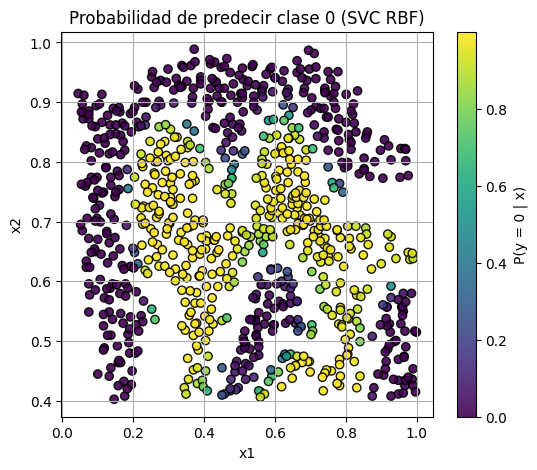

In [ ]:
probs_0 = svc_rbf.predict_proba(X2)[:, 0] 

plt.figure(figsize=(6, 5))

scatter = plt.scatter(
    X2[:, 0],
    X2[:, 1],
    c=probs_0,
    cmap="viridis",    
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Probabilidad de predecir clase 0 (SVC RBF)")

cbar = plt.colorbar(scatter)
cbar.set_label("P(y = 0 | x)")

plt.grid(True)
plt.show()


In [ ]:
# pista: tienes que obtener la probabilidad de ser 0
probs = svc_rbf.predict_proba(X2)

print(probs)
print(probs.shape)


[[3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 ...
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]
 [3.0000009e-14 1.0000000e+00]]
(863, 2)


In [ ]:
svc_5 = SVC(C=1, gamma=10, probability=True)
svc_5.fit(X, y)
svc_5.score(X, y)
y_pred_proba = svc_5.predict_proba(X)
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

NameError: name 'X' is not defined

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

# 1) Cargar el CSV (ajusta el nombre si es ejer_1_data2.csv)
df = pd.read_csv("ejer_1_data1.csv")   # o "ejer_1_data2.csv"

# 2) Definir X e y a partir del DataFrame
X = df[["x1", "x2"]].values   # features
y = df["y"].values            # target

print("X shape:", X.shape)
print("y shape:", y.shape)

# 3) Dividir en train y test (20% test, semilla 42)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)



X shape: (51, 2)
y shape: (51,)
X_train: (40, 2)
X_test:  (11, 2)
y_train: (40,)
y_test:  (11,)


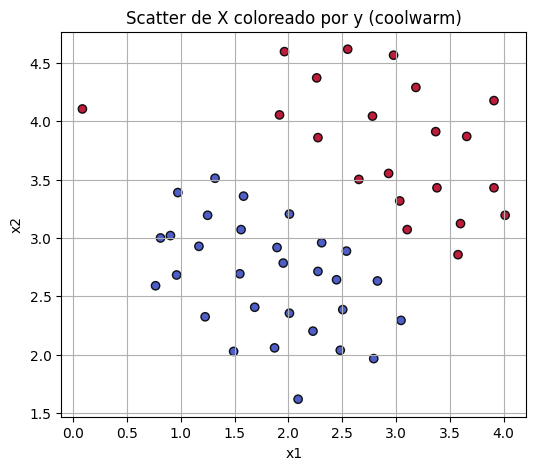

In [ ]:
y_array = np.array(y)

plt.figure(figsize=(6, 5))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y_array,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter de X coloreado por y (coolwarm)")
plt.grid(True)

plt.show()


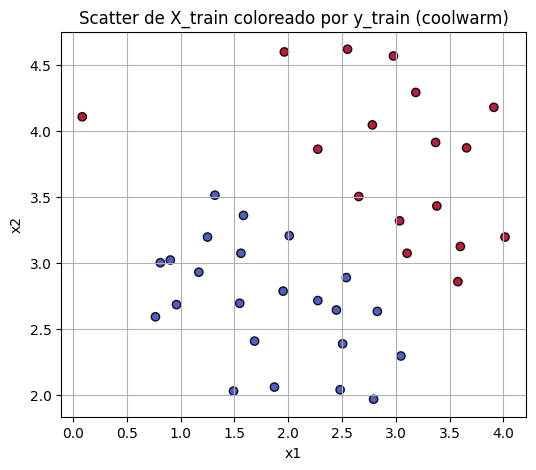

In [27]:
# equivalente con X train

import matplotlib.pyplot as plt
import numpy as np

y_train_array = np.array(y_train)

plt.figure(figsize=(6, 5))

plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train_array,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter de X_train coloreado por y_train (coolwarm)")
plt.grid(True)

plt.show()


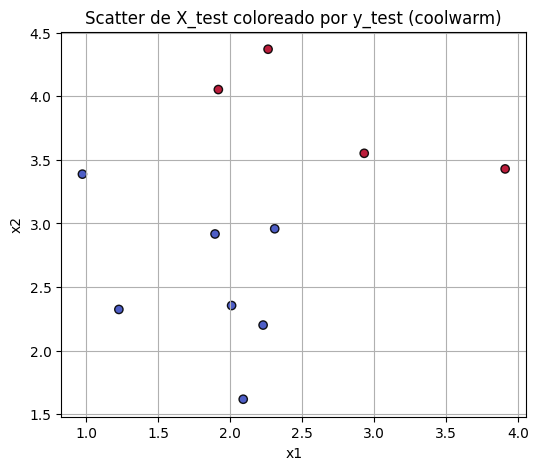

In [28]:
import matplotlib.pyplot as plt
import numpy as np

y_test_array = np.array(y_test)

plt.figure(figsize=(6, 5))

plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test_array,
    cmap="coolwarm",
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter de X_test coloreado por y_test (coolwarm)")
plt.grid(True)

plt.show()


In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()   


param_grid = {
    "kernel": ["rbf", "poly"],      
    "C": [1, 10, 50, 100]          
}

gs = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1            
)

gs.fit(X_train, y_train)


print(gs.best_estimator_)
print(gs.best_params_)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
SVC(C=1)
{'C': 1, 'kernel': 'rbf'}


In [34]:
# mira el score en test
print(gs.best_score_)

0.975


In [ ]:
# usa pickle y guarda el estimador GridsearchCV en un archivo

import pickle

filename = "svc_gridsearch.pkl"



In [ ]:
import pickle

# Nombre del archivo que guardaste antes
filename = "svc_gridsearch.pkl"

with open(filename, "rb") as f:
    gs_loaded = pickle.load(f)


print(gs_loaded)
print(gs_loaded.best_estimator_)
print(gs_loaded.best_params_)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100], 'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)
SVC(C=1)
{'C': 1, 'kernel': 'rbf'}


In [ ]:
best_model = gs.best_estimator_
best_model


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [41]:


# Obtén las probabilidades de ser 1 en test
best_model = gs.best_estimator_

# Probabilidades de cada clase en test
y_test_proba = best_model.predict_proba(X_test)  # shape: (n_test, 2)

# Probabilidad de ser clase 1
y_test_proba_1 = y_test_proba[:, 1]

print(y_test_proba_1[:10])   # las 10 primeras
print("Shape:", y_test_proba_1.shape)


AttributeError: This 'SVC' has no attribute 'predict_proba'

<Axes: xlabel='x1', ylabel='x2'>

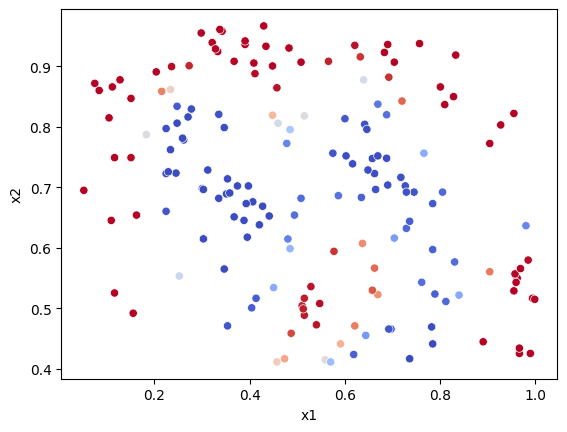

In [ ]:
# haz un scatterplot y pinta esos puntos de test con sus probabilidades de ser 1

plt.figure(figsize=(6, 5))

sc = plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test_proba_1,
    cmap="viridis",      # puedes usar "coolwarm" si prefieres
    edgecolor="k",
    alpha=0.9
)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Puntos de test coloreados por P(y = 1 | x)")

cbar = plt.colorbar(sc)
cbar.set_label("Probabilidad de ser clase 1")

plt.grid(True)
plt.show()
